In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from pprint import pprint

%matplotlib inline

In [2]:
class TimeValue:
    def __init__(self, time, value):
        self.time = time * 1.0
        self.value = value * 1.0

    def __repr__(self):
        return '({}, {})'.format(self.time, self.value)

In [3]:
class TimeSeries:
    def __init__(self, points=[]):
        self.series = []
        for (time, value) in points:
            self.append(time, value)
        
    def append(self, time, value):
        self.series.append(TimeValue(time, value))
        self.series = sorted(self.series, key=lambda x: x.time)
        
    @property
    def initial(self):
        return self.series[0]
    
    @property
    def timeline(self):
        return [x.time for x in self.series]
    
    @property
    def values(self):
        return [x.value for x in self.series]
    
    @property
    def components(self, i=None):
        try:
            return list(zip(*self.values))
        except:
            return [self.values]

    def plot(self, toggle='0', loc='best', pad=False, grid=True, marker=None, labels=None, colors=None, lw=1):
        if len(self.components) > 1:
            plt.plot(self.timeline, self.values, marker=marker)
            if loc:
                plt.legend(['x','y','z'][:len(self.components)], loc=loc, numpoints=1)
        else:
            ts = dict()
            ts['0'] = self
            ts['1'] = self.rate_of_change()
            ts['2'] = self.rate_of_change().rate_of_change()
            
            if colors is None:
                colors = [None, None, None]
            else:
                colors = colors * len(toggle) # just in case...

            if labels is None:
                labels = ['position', 'velocity', 'acceleration']
            else:
                labels += [None] * (len(toggle) - len(labels)) # just in case...

            if len(toggle) > 1:
                plt.figure(figsize=(6 * len(toggle), 4))
                
            for i, tog in enumerate(toggle):
                if len(toggle) > 1:
                    plt.subplot(1, len(toggle), toggle.index(tog) + 1)
                plt.plot(ts[tog].timeline, ts[tog].values, marker=marker, 
                         label=labels[i], color=colors[i], lw=lw)
                plt.xlabel('Time')
                if pad:
                    plt.margins(0.05)
                    dt = 0.03 * (self.timeline[-1] - self.timeline[0])
                    plt.axes().set_xlim([self.timeline[0] - dt, self.timeline[-1] + dt])
                if grid:
                    plt.grid(True)
                    plt.gca().axhline(0, c='k')
                if loc and labels[i]:
                    plt.legend(loc=loc, numpoints=1)
                            
    def plot2d(self, toggle='0', x_index=0, y_index=1, title='', colors='', labels=[],
               grid=True, pad=0.10, loc=None, markevery=0, arrows=False, lim=False):
        
        x = dict()
        y = dict()
        
        r = self
        x['0'] = r.components[x_index]
        y['0'] = r.components[y_index]

        v = r.rate_of_change()
        x['1'] = v.components[x_index]
        y['1'] = v.components[y_index]

        a = v.rate_of_change()
        x['2'] = a.components[x_index]
        y['2'] = a.components[y_index]

        color = dict()
        if colors:
            for i, tog in enumerate(toggle):
                color[tog] = colors[i]
        else:
            color['0'] = 'b'
            color['1'] = 'g'
            color['2'] = 'r'            

        label = dict()
        if labels:
            for i, tog in enumerate(toggle):
                label[tog] = labels[i]
        else:
            label['0'] = 'position'
            label['1'] = 'velocity'
            label['2'] = 'acceleration'
                
        for i, tog in enumerate(toggle):
            plt.plot(x[tog], y[tog], c=color[tog], markevery=[-1], 
                     marker='o', mfc='w', mec=color[tog], mew=1)
            if markevery:
                plt.plot(x[tog][:-1], y[tog][:-1], lw=0, markevery=markevery, 
                         marker='.', mec=color[tog])
            
        plt.axes().set_aspect('equal')
        plt.margins(pad)
        if loc:
            plt.legend(numpoints=1, loc=loc, labels=labels)
        plt.title(title)
        
        if grid:
            plt.grid(True)
            plt.axes().axhline(0, c='k')
            plt.axes().axvline(0, c='k')

        if arrows:
            xmin, xmax = plt.xlim()
            ymin, ymax = plt.ylim()
            size = 0.5 * (xmax - xmin) + 0.5 * (ymax - ymin)
            head_size = {
                'head_width': 0.03 * size,
                'head_length': 0.05 * size,
            }
            if '1' in toggle:
                plt.axes().arrow(x['0'][-1], y['0'][-1], x['1'][-1], y['1'][-1], 
                                 fc=color['1'], ec=color['1'], **head_size)
            if '2' in toggle:
                plt.axes().arrow(x['0'][-1], y['0'][-1], x['2'][-1], y['2'][-1], 
                                 fc=color['2'], ec=color['2'], **head_size)
#             xmax = max(xmax,x['0'][-1],x['1'][-1],x['2'][-1])
#             xmin = min(xmin,x['0'][-1],x['1'][-1],x['2'][-1])
#             ymax = max(ymax,y['0'][-1],y['1'][-1],y['2'][-1])
#             ymin = min(ymin,y['0'][-1],y['1'][-1],y['2'][-1])
#             plt.axes().set_xlim([xmin,xmax])
#             plt.axes().set_ylim([ymin,ymax])
        if lim:
            assert len(lim) == 4
            plt.axes().set_xlim([lim[0],lim[1]])
            plt.axes().set_ylim([lim[2],lim[3]])

    def plot3view(self, grid=True, markevery=0):
        assert len(self.components) == 3
        x,y,z = self.components
        fig = plt.figure(figsize=(10, 3.5))
        
        ax1 = plt.subplot(131) # equivalent to: plt.subplot(2, 2, 1)

        ax1.plot(x, y, c='b', markevery=[-1], marker='o', mfc='w', mec='b', mew=1)
        if markevery:
            ax1.plot(x[:-1], y[:-1], lw=0, markevery=markevery, marker='.', mec='b')
        
        ax1.grid(grid)
        ax1.set_aspect('equal')
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        ax1.set_title('Top View')
        
        ax2 = plt.subplot(132, sharex=ax1)
        
        ax2.plot(x, z, c='b', markevery=[-1], marker='o', mfc='w', mec='b', mew=1)
        if markevery:
            ax2.plot(x[:-1], z[:-1], lw=0, markevery=markevery, marker='.', mec='b')

        ax2.grid(grid)
        ax2.set_aspect('equal')
        ax2.set_xlabel('x')
        ax2.set_ylabel('z')
        ax2.set_title('Side View (x)')
        
        ax3 = plt.subplot(133, sharey=ax1)
        
        ax3.plot(y, z, c='b', markevery=[-1], marker='o', mfc='w', mec='b', mew=1)
        if markevery:
            ax3.plot(y[:-1], z[:-1], lw=0, markevery=markevery, marker='.', mec='b')
            
        ax3.grid(grid)
        ax3.set_aspect('equal')
        ax3.set_xlabel('y')
        ax3.set_ylabel('z')
        ax3.set_title('Side View (y)')
        fig.tight_layout()
            
    @property
    def intervals(self):
        intervals = []
        for i in range(1, len(self.series)):
            intervals.append((self.series[i - 1], self.series[i]))
        return intervals    
 
    def get_interval(self, time): # closed on left [a, b)
        tmin = min(self.timeline)
        tmax = max(self.timeline)
        if time < tmin:
            return None, self.series[0]
        elif time >= tmax:
            return self.series[-1], None
        else:
            for a, b in self.intervals:
                if a.time <= time and time < b.time:
                    return a, b
    
    def rate_of_change(self):
        ts = TimeSeries()
        for i, (a, b) in enumerate(self.intervals):
            dx = b.value - a.value
            dt = b.time - a.time
            if 1 == 0:
                ts.append(a.time, dx/dt)
            else:
                ts.append(a.time + dt/2, dx/dt)
        return ts
                
    def __call__(self, time):
        a, b = self.get_interval(time)
        # this method will not extrapolate, but we do need to take care of this edge case...
        if b is None and round(a.time - time, 10) == 0:
            return a.value
        else:
            dx = b.value - a.value
            dt = b.time - a.time
            return a.value + dx/dt * (time - a.time)

    def __getitem__(self, index):
        if isinstance(index, int):
            return self.series[index]
        elif isinstance(index, slice):
            return self.series[index]
        else:
            raise TypeError("index must be int or slice")
        
    def __repr__(self):
        import pprint
        return pprint.pformat(self.series)


In [4]:
class Particle():
    def __init__(self, mass=1, t0=0, r0=None, v0=None, p0=None, dim=1):
        
        # The only purpose of the following is to redefine the defaults
        # I am *not* error-checking the input parameters...

        if isinstance(r0, np.ndarray):
            dim = max(len(r0), dim)
        if isinstance(v0, np.ndarray):
            dim = max(len(v0), dim)

        if r0 is None:
            if dim == 1:
                r0 = 0
            else:
                r0 = np.zeros(dim)
            
        if v0 is None:
            if dim == 1:
                v0 = 0
            else:
                v0 = np.zeros(dim)
                    
        self.mass = mass
        self.position = TimeSeries([(t0, r0)])
        if self.mass and p0 is None:
            self.momentum = TimeSeries([(t0, self.mass * v0)])
        else:
            self.momentum = TimeSeries([(t0, p0)])
        self.forces = {}

    def add_force(self, force, name=None):
        if name is None:
            name = len(self.forces)
        self.forces[name] = ( lambda t, obj=self: force(obj, t) )
        
    def net_force(self, time): # momentum flow or rate of change
        net_force = 0
        for name, force in self.forces.items():
            net_force += force(time)
        return net_force

    def velocity(self, time): # position flow or rate of change
        if time > max(self.momentum.timeline):
            time = max(self.momentum.timeline)
        return self.momentum(time) / self.mass

    def acceleration(self, time):
        r = self.position
        v = r.rate_of_change()
        a = v.rate_of_change()
        if time >= a.timeline[-1]:
            return a.values[-1]
        elif time <= a.timeline[0]:
            return a.values[0]
        else:
            return a(time)
    
    def increment(self, dt, n=1):
        for i in range(n):
            t = max(self.position.timeline)

            if len(self.position.timeline) == 1: # then only go forward half an increment            
                next_p = self.momentum(t) + self.net_force(t) * dt/2
                self.momentum = TimeSeries() # throw out that "initial" value
            else: # reach back half an increment to calculate the new momentum value
                next_p = self.momentum(t - dt/2) + self.net_force(t) * dt

            self.momentum.append(t + dt/2, next_p)
            next_r = self.position(t) + self.velocity(t + dt/2) * dt        
            self.position.append(t + dt, next_r)
            
    def plot(self, **kwargs):
        self.position.plot(**kwargs)
        
    def plot2d(self, **kwargs):
        self.position.plot2d(**kwargs)
        
    def plot3view(self, **kwargs):
        self.position.plot3view(**kwargs)

In [5]:
class PhysicalSystem():
    def __init__(self, initial=[]):
        self.objs = list()
        for (mass, r0, v0) in initial:
            self.objs.append(Particle(mass=mass, r0=r0, v0=v0))
                    
        for obj1 in self.objs:
            for obj2 in self.objs:
                if obj1 != obj2: # no self-interactions !
                    internal_force = lambda t, obj1=obj1, obj2=obj2: self.interaction(obj1, obj2, t)
                    obj1.forces.append(internal_force)
                    
    def interaction(self, obj1, obj2, time):
        return 0
                    
    def increment(self, dt, n=1):
        for i in range(n):
            for obj in self.objs:
                obj.increment(dt)
                
    def plot(self):
        for i, obj in enumerate(self.objs):
            obj.position.plot(legend_loc=None)
            
    def plot2d(self, colors='bgrcmyk'*9, **kwargs):
        for i, obj in enumerate(self.objs):
            obj.position.plot2d(color=colors[i], **kwargs)

In [6]:
import cmath

class RigidObject(Particle):
    def __init__(self, mass=1, t0=0, r0=0, p0=0, v0=None, moi=1, q0=1+0j, L0=0+0j, w0=None):
        Particle.__init__(self, mass, t0, r0, p0, v0)
        self.moi = moi
        self.attitude = TimeSeries([(t0, q0)])
        self.angular_displacement = TimeSeries([(t0, cmath.phase(q0))])
        if self.moi and w0 is not None:
            self.angular_momentum = TimeSeries([(t0, self.moi * w0)])
        else:
            self.angular_momentum = TimeSeries([(t0, L0)])
        self.torques = []
    
    def add_torque(self, torque):
        self.torques.append(lambda t, obj=self: torque(obj, t))        
        
    def net_torque(self, time): # angular_momentum flow or rate of change
        net_torque = 0+0j
        for tau in self.torques:
            net_torque += tau(time)
        return net_torque

    def rotational_velocity(self, time): # attitude flow or rate of change
        if time > max(self.angular_momentum.timeline):
            time = max(self.angular_momentum.timeline)
        return self.angular_momentum(time) / self.moi
    
    def increment(self, dt, n=1):
        for i in range(n):
            Particle.increment(self, dt, 1)
            
            t = max(self.attitude.timeline)

            if len(self.attitude.timeline) == 1: # then only go forward half an increment            
                next_L = self.angular_momentum(t) + self.net_torque(t) * dt/2
                self.angular_momentum = TimeSeries() # throw out that "initial" value
            else: # reach back half an increment to calculate the new momentum value
                next_L = self.angular_momentum(t - dt/2) + self.net_torque(t) * dt                

                q = self.angular_displacement(t - dt)
                q += self.rotational_velocity(t + dt/2) * dt
                self.angular_displacement.append(t, q)

            self.angular_momentum.append(t + dt/2, next_L)
            rotor = np.exp( 1j * self.rotational_velocity(t + dt/2) * dt )
            next_attitude = self.attitude(t) * rotor
            self.attitude.append(t + dt, next_attitude)

In [7]:
def vmag(a):
    return np.sqrt(vdot(a, a))

def vdir(a):
    if vmag(a) == 0:
        vdir = np.array([1]+[0]*(len(a)-1)) # it doesn't matter since magnitude = 0
    else:
        vdir = a / vmag(a)
    return vdir
        
def vang(a, deg=True, x_index=0, y_index=1):
    vang = np.arctan2(a[y_index], a[x_index])
    if deg:
        vang = vang * 180/np.pi
    return vang

def vect(mag, ang, deg=True):
    if deg:
        ang = ang * np.pi/180
    return mag * np.array([np.cos(ang), np.sin(ang)])

def vdot(a, b):
    assert len(a) == len(b)
    vdot = 0
    for i in range(len(a)):
        vdot += a[i] * b[i]
    return vdot

In [8]:
def weight(obj, t):
    return np.array([0, -9.8 * obj.mass])

def support(obj, t, normal=np.array([0,1])):
    normal = vdir(normal)
    net_force = obj.net_force(t)
    net_force_proj = vdot(net_force, normal)
    support = -net_force_proj * normal
    return support

def friction(obj, t, support, mu_s=1, mu_k=1):
    net_force = obj.net_force(t)
    v = obj.velocity(t)
    
    frickin = False
    if vmag(v) > 0:
        frickin = True
    if vmag(net_force) > mu_s * vmag(support): # maximum static friction
        frickin = True
        
    if frickin: # then use kinetic friction
        friction = -mu_k * vmag(support) * vdir(v)
    else: # create equilibrium
        friction = -net_force
        
    return friction

## Chapter 5

**Problem 005**

How long does it take a plane, traveling at a constant speed of 110 m/s, to fly once around a circle whose radius is 2850 meters?

*Answer:* 160 seconds

tangential speed = 110 m/s
duration = 163 seconds


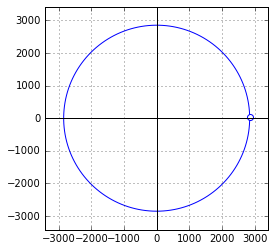

In [10]:
speed = 110
radius = 2850
omega = speed/radius * 180/np.pi # degrees per second

obj = Particle()
obj.position.series.pop()

t = 0
while True:
    theta = omega * t
    location = vect(radius, theta)
    obj.position.append(t, location)
    if theta > 360:
        break
    t += 1

r = obj.position
v = r.rate_of_change()
r.plot2d()

t = r.timeline[-1]
print('tangential speed = {:.0f} m/s'.format(vmag(v.values[-1])))
print('duration = {:.0f} seconds'.format(t))

**Problem 007**

The blade of a windshield wiper moves through an angle of 90.0° in 0.40 seconds. The tip of the blade moves on the arc of a circle that has a radius of 0.45 meters. What is the magnitude of the centripetal acceleration on the tip of the blade?

*Answer:* 6.9 m/s²

tangential speed = 1.77 m/s
duration = 0.40 seconds
magnitude of acceleration = 6.94 m/s²


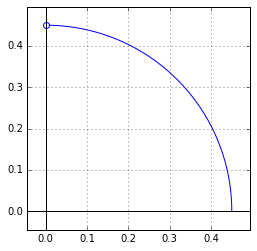

In [11]:
radius = 0.45
omega = 90 / 0.40 # degrees per second

obj = Particle()
obj.position.series.pop()

t = 0
while True:
    theta = omega * t
    location = vect(radius, theta)
    obj.position.append(t, location)
    if theta > 90:
        break
    t += 0.01

r = obj.position
v = r.rate_of_change()
r.plot2d()

t = r.timeline[-1]
print('tangential speed = {:.2f} m/s'.format(vmag(v.values[-1])))
print('duration = {:.2f} seconds'.format(t))

a = obj.acceleration(t)
print('magnitude of acceleration = {:.2f} m/s²'.format(vmag(a)))

**Problem 008**

There is a clever kitchen gadget for drying lettuce leaves after you wash them. It consists of a cylindrical container mounted so that it can be rotated about its axis by turning a hand crank. The outer wall of the cylinder is perforated with small holes. You put the wet leaves in the container and turn the crank to spin off the water. The radius of the container is 12 cm. When the cylinder is rotating at 2.0 revolutions per second, what is the magnitude of the centripetal acceleration at the outer wall?

*Answer:* 19 m/s²

tangential speed = 1.5 m/s
magnitude of acceleration = 18.9 m/s²


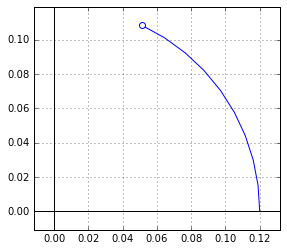

In [12]:
radius = 0.12
omega = 2 * 360 # degrees per second

obj = Particle()
obj.position.series.pop()

for i in range(10):
    t = 0.01 * i
    theta = omega * t
    location = vect(radius, theta)
    obj.position.append(t, location)

r = obj.position
v = r.rate_of_change()
r.plot2d()

t = r.timeline[-1]
print('tangential speed = {:.1f} m/s'.format(vmag(v.values[-1])))

a = obj.acceleration(t)
print('magnitude of acceleration = {:.1f} m/s²'.format(vmag(a)))

**Problem 009**

Computer-controlled display screens provide drivers in the Indianapolis 500 with a variety of information about how their cars are performing. For instance, as a car is going through a turn, a speed of 221 mph (98.8 m/s) and centripetal acceleration of 3.00 `g` (three times the acceleration due to gravity) are displayed. Determine the radius of the turn (in meters).

*Answer:* 332 meters

radius of curvature = 332.0 meters


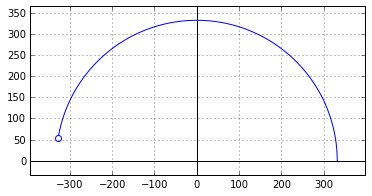

In [13]:
radius = 0

for dr in [1000, 100, 10, 1, 0.1]:
    while True:
        radius += dr
        obj = Particle(r0=np.array([radius,0]),v0=np.array([0,98.8]))
        obj.add_force(lambda obj, t: -3 * 9.8 * vdir(obj.position(t)))
        obj.increment(0.1,100)
        rf = vmag(obj.position.values[-1])
        if rf < radius:
            radius -= dr
            break

obj.position.plot2d()
print('radius of curvature = {:.1f} meters'.format(radius))

**Problem 015**

Car A uses tires for which the coefficient of static friction is 1.1 on a particular unbanked curve. The maximum speed at which the car can negotiate this curve is 25 m/s. Car B uses tires for which the coefficient of static friction is 0.85 on the same curve. What is the maximum speed at which car B can negotiate the curve?

*Answer:* 22 meters

Radius of the circle = 58.0 meters
The speed of the second car = 21.9 m/s


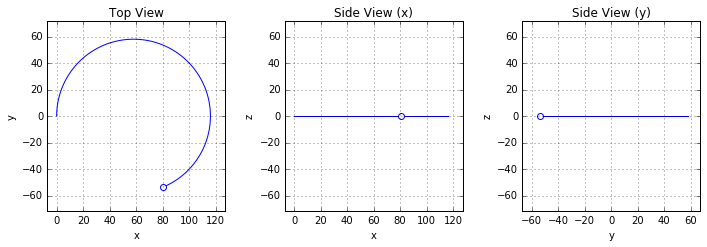

In [100]:
dt = 0.1

# Step 1: Determine the radius

initial_speed = 25

r0 = np.array([0,0,0])
v0 = np.array([0,initial_speed,0])
obj = Particle(r0=r0,v0=v0)

obj.add_force(lambda obj, t: np.array([0,0,-9.8 * obj.mass]))

t = max(obj.position.timeline)
s = support(obj, t, np.array([0,0,1]))
obj.add_force(lambda obj, t: s)

max_d = 0
for _ in range(100):
    if 'fricsta' in obj.forces:
        del obj.forces['fricsta']

    mag_fricsta = 1.1 * vmag(s)

    t = max(obj.position.timeline)
    v = obj.velocity(t)

    q = vang(v) - 90
    # the following is a geometric correction to guarentee the resultant velocity 
    # has the same speed as the one before it
    if len(obj.position.timeline) == 1:
        dq = 0.5 * np.arccos(1 - 0.5 * (mag_fricsta * dt/2) ** 2 / vmag(v) ** 2) * 180/np.pi
    else:
        dq = 0.5 * np.arccos(1 - 0.5 * (mag_fricsta * dt) ** 2 / vmag(v) ** 2) * 180/np.pi
    q -= dq
    
    fricsta = mag_fricsta * np.array([np.cos(q * np.pi/180),np.sin(q * np.pi/180),0])
    obj.add_force(lambda obj, t: fricsta, 'fricsta')

    obj.increment(dt)
    max_d = max(max_d, vmag(obj.position.values[-1] - r0))

radius = max_d / 2

print('Radius of the circle = {:.1f} meters'.format(radius))
obj.plot3view()

# Step 2: Calculate speed for second car

initial_speed = 0
for dv in [100,10,1,0.1]:
    while True:
        initial_speed += dv

        r0 = np.array([0,0,0])
        v0 = np.array([0,initial_speed,0])
        obj = Particle(r0=r0,v0=v0)

        obj.add_force(lambda obj, t: np.array([0,0,-9.8 * obj.mass]))

        t = max(obj.position.timeline)
        s = support(obj, t, np.array([0,0,1]))
        obj.add_force(lambda obj, t: s)

        max_d = 0
        for _ in range(100):
            if 'fricsta' in obj.forces:
                del obj.forces['fricsta']

            mag_fricsta = 0.85 * vmag(s)

            t = max(obj.position.timeline)
            v = obj.velocity(t)

            q = vang(v) - 90
            # the following is a geometric correction to guarentee the resultant velocity 
            # has the same speed as the one before it
            if len(obj.position.timeline) == 1:
                dq = 0.5 * np.arccos(1 - 0.5 * (mag_fricsta * dt/2) ** 2 / vmag(v) ** 2) * 180/np.pi
            else:
                dq = 0.5 * np.arccos(1 - 0.5 * (mag_fricsta * dt) ** 2 / vmag(v) ** 2) * 180/np.pi
            q -= dq

            fricsta = mag_fricsta * np.array([np.cos(q * np.pi/180),np.sin(q * np.pi/180),0])
            obj.add_force(lambda obj, t: fricsta, 'fricsta')

            obj.increment(dt)
            max_d = max(max_d, vmag(obj.position.values[-1] - r0))

        if max_d / 2 > radius: 
            initial_speed -= dv
            break
        
print('The speed of the second car = {:.1f} m/s'.format(initial_speed))

**Problem 023**

A "swing" ride at a carnival consists of chairs that are swung in a circle by 15.0-meter cables attached to a vertical rotating pole, as the drawing shows (60°). Suppose the total mass of a chair and its occupant is 179 kilograms. (a) Determine the tension in the cable attached to the chair. (b) Find the speed of the chair.

*Answer:* (a) 3510 newtons (b) 14.9 m/s

The speed to generate flat circular motion = 14.9 m/s
The corresponding tension in the cable = 3508 newtons


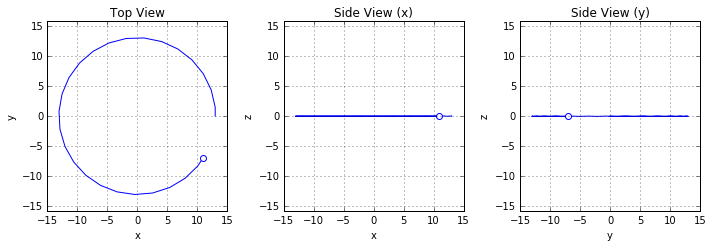

In [109]:
cable_length = 15
cable_angle = 60 * np.pi/180
height = cable_length * np.cos(cable_angle) # adjacent the angle
radius = cable_length * np.sin(cable_angle) # opposite the angle

dt = 0.1

initial_speed = 0
for dv in [10,1,0.1,0.01,0.001]:
    while True:
        initial_speed += dv
        r_pivot = np.array([0,0,height])
        
        r0 = np.array([radius, 0, 0])
        v0 = np.array([0,initial_speed,0])
        obj = Particle(mass=179,r0=r0,v0=v0)
        obj.add_force(lambda obj, t: np.array([0,0,-9.8 * obj.mass]))

        max_z = 0
        for i in range(4):
            if 'support' in obj.forces:
                del obj.forces['support']

            t = max(obj.position.timeline)
            cable_vector = obj.position(t) - r_pivot

            n = -vdir(cable_vector)
            s = n * -vdot(obj.momentum.values[-1], n) / dt * 2
            s += n * -vdot(obj.net_force(t), n)

            r = vmag(cable_vector)
            if r > cable_length:
                obj.add_force(lambda obj, t: s, 'support')

            obj.increment(dt)    

            x,y,z = obj.position(t)
            max_z = max(max_z, z)
            
        if max_z > 0:
            initial_speed -= dv
            break
            
# initial_speed = 10

r0 = np.array([radius, 0, 0])
v0 = np.array([0,initial_speed,0])
obj = Particle(mass=179,r0=r0,v0=v0)
obj.add_force(lambda obj, t: np.array([0,0,-9.8 * obj.mass]))

for i in range(50):
    if 'support' in obj.forces:
        del obj.forces['support']

    t = max(obj.position.timeline)
    cable_vector = obj.position(t) - r_pivot

    n = -vdir(cable_vector)
    s = n * -vdot(obj.momentum.values[-1], n) / dt * 2
    s += n * -vdot(obj.net_force(t), n)

    r = vmag(cable_vector)
    if r > cable_length:
        obj.add_force(lambda obj, t: s, 'support')

    obj.increment(dt)    

    
# support = vmag(obj.forces['support'](t))
support = vmag(s) / 2
print('The speed to generate flat circular motion = {:.1f} m/s'.format(initial_speed))
print('The corresponding tension in the cable = {:.0f} newtons'.format(support))

obj.plot3view()

**Problem 027**

Two banked curves have the same radius. Curve A is banked at an angle of 13°, and curve B is banked at an angle of 19°. A car can travel around curve A without relying on friction at a speed of 18 m/s. At what speed can this car travel around curve B without relying on friction?

*Answer:* 22 m/s

The radius of the circle is 143.2 meters
The speed of the second object is 22.0 m/s


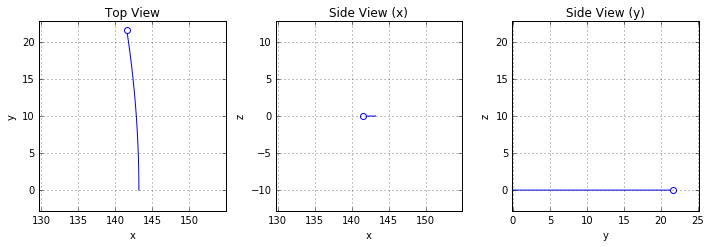

In [419]:
# Step 1: what is the radius?

bank_angle = 13 * np.pi/180
radius = 0

for dr in [1000,100,10,1,0.1]:
    while True:
        radius += dr
        tot_z = 0
        
        initial_speed = 18
        obj = Particle(r0=np.array([radius,0,0]),v0=np.array([0,initial_speed,0]))

        w = np.array([0,0,-9.8 * obj.mass])
        obj.add_force(lambda obj, t: w)

        dt = 0.01
        nbr_iter = 99

        for i in range(nbr_iter):
            if 'support' in obj.forces:
                del obj.forces['support']

            t = obj.position.timeline[-1]
            x,y,z = obj.position(t)
            tot_z += z

            nx = -x / radius * np.sin(bank_angle)
            ny = -y / radius * np.sin(bank_angle)
            nz = np.cos(bank_angle)

            bank_normal = np.array([nx,ny,nz])

            n = vdir(bank_normal)
            s = n * -vdot(obj.momentum.values[-1], n) / dt * 2
            s += n * -vdot(obj.net_force(t), n)

            r = vmag(np.array([x,y]))
            if r > radius + z / np.sin(bank_angle):
                obj.add_force(lambda obj, t: s, 'support')

            obj.increment(dt)

        if z < 0:
            radius -= dr
            break

print('The radius of the circle is {:.1f} meters'.format(radius))
            
# Step 2: what is the speed?

bank_angle = 19 * np.pi/180
initial_speed = 0

for dv in [100,10,1,0.1,0.01]:
    while True:
        initial_speed += dv
        
        obj = Particle(r0=np.array([radius,0,0]),v0=np.array([0,initial_speed,0]))

        w = np.array([0,0,-9.8 * obj.mass])
        obj.add_force(lambda obj, t: w)

        dt = 0.01
        nbr_iter = 99

        for i in range(nbr_iter):
            if 'support' in obj.forces:
                del obj.forces['support']

            t = obj.position.timeline[-1]
            x,y,z = obj.position(t)

            nx = -x / radius * np.sin(bank_angle)
            ny = -y / radius * np.sin(bank_angle)
            nz = np.cos(bank_angle)

            bank_normal = np.array([nx,ny,nz])

            n = vdir(bank_normal)
            s = n * -vdot(obj.momentum.values[-1], n) / dt * 2
            s += n * -vdot(obj.net_force(t), n)

            r = vmag(np.array([x,y]))
            if r > radius + z / np.sin(bank_angle):
                obj.add_force(lambda obj, t: s, 'support')

            obj.increment(dt)

        if z > 0:
            initial_speed -= dv
            break 
            
print('The speed of the second object is {:.1f} m/s'.format(initial_speed))

obj.position.plot3view()

**Problem 031**

Two satellites are in circular orbits around the earth. The orbit for satellite A is at a height of 360 km above the earth's surface, while that for satellite B is at a height of 720 km. Find the orbital speed for each satellite.

*Answer:* (a) 7690 m/s (b) 7500 m/s

For a satellite at a height of 360,000 meters has a circular orbit at v0 = 7695 m/s
For a satellite at a height of 720,000 meters has a circular orbit at v0 = 7497 m/s


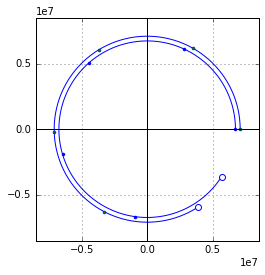

In [702]:
def gravitation_fixed(obj, t):
    G = 6.674e-11
    M = 5.972e+24
    GM = G * M
    x, y = obj.position(t)
    d = np.sqrt( x ** 2 + y ** 2 )
    return -GM * obj.mass * np.array([x,y]) / d ** 3

r_earth = 6371000

h0 = 360000

for h0 in [360,720]:
    h0 *= 1000    
    r0 = h0 + r_earth

    v0 = 0
    for dv in [10000,1000,100,10,1]:
        while True:
            v0 += dv
            obj = Particle(t0=0, r0=np.array([r0,0]), v0=np.array([0,v0]))
            obj.add_force(gravitation_fixed)
            max_r = r0
            min_r = r0
            obj.increment(0.1,10)
            r = obj.position.values[-1]
            if vmag(r) > r0:
                v0 -= dv
                break

    obj = Particle(t0=0, r0=np.array([r0,0]), v0=np.array([0,v0]))
    obj.add_force(gravitation_fixed)
    obj.increment(10,500)
    obj.plot2d(markevery=100)
    
    print('For a satellite at a height of {:,.0f} meters has a circular orbit at v0 = {:.0f} m/s'.format(h0,v0))

**Problem 041**

A motorcycle has a constant speed of 25.0 m/s as it passes over the top of a hill whose radius of curvature is 126 meters. The mass of the motorcycle and driver is 342 kilograms. Find the magnitudes of (a) the centripetal force and (b) the normal force that acts on the cycle.

*Answer:* (a) 1700 newtons (b) 1660 newtons

At the top:
- Time = 2.45 seconds
- Position = 126 meters @ 90.0°
- Velocity = 25.0 m/s @ -0.1°
Liftoff:
- Time = 6.21 seconds
- Position = 127 meters @ 39.4°
- Velocity = 38.9 m/s @ -46.4°
At the end:
- Time = 8.31 seconds
- Position = 155 meters @ -0.1°
- Velocity = 38.9 m/s @ -46.4°
1663.6208827


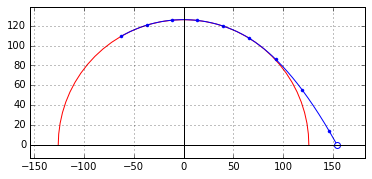

In [524]:
xy = []
for q in np.linspace(0,180,37):
    xy.append([126*np.cos(q*np.pi/180),126*np.sin(q*np.pi/180)])
plt.plot(*zip(*xy),'r')

dt = 0.01

r0 = 126*np.array([np.cos(120*np.pi/180),np.sin(120*np.pi/180)])
v0 = 30.9*np.array([np.cos(30*np.pi/180),np.sin(30*np.pi/180)])
obj = Particle(mass=342,r0=r0,v0=v0)
obj.add_force(lambda obj, t: weight(obj), 'weight')

at_the_top = False
liftoff = False
support_list = []
for i in range(1000):
    if 'support' in obj.forces:
        del obj.forces['support']

    t = max(obj.position.timeline)
    x,y = obj.position(t)
    r = vmag(np.array([x,y]))
    q = np.arctan2(y,x)
    n = np.array([np.cos(q), np.sin(q)])
    
    s = n * -vdot(obj.momentum.values[-1], n) / dt * 2
    s += n * -vdot(obj.net_force(t), n)
    
    if y > 0 and r < 126: # and s < 0:
        obj.add_force(lambda obj, t: s, 'support')

    if abs(q - np.pi/2) < 0.05:
        support_list.append(s)
        
    if q < np.pi/2 and not at_the_top:
        at_the_top = True
        v = obj.velocity(t)
        f = obj.net_force(t)
        print('At the top:')
        print('- Time = {:.2f} seconds'.format(t))
        print('- Position = {:.0f} meters @ {:.1f}°'.format(r,q*180/np.pi))
        print('- Velocity = {:.1f} m/s @ {:.1f}°'.format(vmag(v),vang(v)))
#         print('- Magnitude of support force = {:.0f} newtons @ {:.0f}°'.format(vmag(s),vang(s)))
#         f = obj.net_force(t)
#         print('- Magnitude of net force = {:.0f} newtons @ {:.0f}°'.format(vmag(f),vang(f)))

        
    if r > 127 and not liftoff:
        liftoff = True
        v = obj.velocity(t)
        f = obj.net_force(t)
        print('Liftoff:')
        print('- Time = {:.2f} seconds'.format(t))
        print('- Position = {:.0f} meters @ {:.1f}°'.format(r,q*180/np.pi))
        print('- Velocity = {:.1f} m/s @ {:.1f}°'.format(vmag(v),vang(v)))
        
    if y < 0:
        break
        
    obj.increment(dt)

print('At the end:')
print('- Time = {:.2f} seconds'.format(t))
print('- Position = {:.0f} meters @ {:.1f}°'.format(r,q*180/np.pi))
print('- Velocity = {:.1f} m/s @ {:.1f}°'.format(vmag(v),vang(v)))
    
# from pprint import pprint
# pprint(support_list)
# print(sum(support_list)/len(support_list))

print(vmag(sum(support_list)/len(support_list)))

obj.plot2d(markevery=100)#,lim=[-60,-40,110,130])

**Problem 052**

A child is twirling a 0.0120-kilogram plastic ball on a string in a horizontal circle whose radius is 0.100 meters. The ball travels once around the circle in 0.500 seconds. (a) Determine the centripetal force acting on the ball. (b) If the speed is doubled, does the centripetal force double? If not, by what factor does the centripetal force increase?

*Answer:* (a) 0.189 newtons (b) 4

For a tangential speed of 1.3 m/s
Magnitude of net_force = 0.1895 newtons


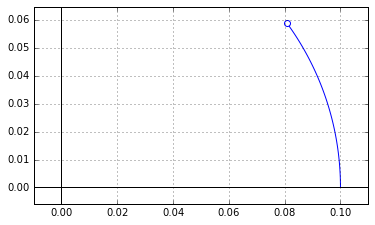

For a tangential speed of 2.5 m/s
Magnitude of net_force = 0.7581 newtons


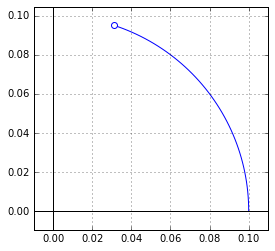

The ratio of the initial speeds is 2.0
The ratio of the centripetal force is 4.0


In [156]:
f = 0.5

radius = 0.1
initial_speed = 2 * np.pi * 0.1 / 0.5 # 2πr/T
r0 = np.array([radius,0])
v0 = np.array([0,initial_speed])

f = 0
dt = 0.001
for df in [1,0.1,0.001,0.0001]:
    while True:
        f += df
        obj = Particle(mass=0.0120, r0=r0, v0=v0)
        
        for _ in range(50):
            if 'tension' in obj.forces:
                del obj.forces['tension']

            r = obj.position.values[-1]
            tension_force = f * -vdir(r)
            obj.add_force(lambda obj, t: tension_force, 'tension')

            obj.increment(dt)

        if vmag(r) < radius:
            f -= df
            break

f1 = f
v1 = initial_speed
print('For a tangential speed of {:.1f} m/s'.format(v1))
print('Magnitude of net_force = {:.4f} newtons'.format(f1))
obj.plot2d()
plt.show()

# Now double the speed

radius = 0.1
initial_speed = 2 * np.pi * 0.1 / 0.5 # 2πr/T
initial_speed *= 2
r0 = np.array([radius,0])
v0 = np.array([0,initial_speed])

f = 0
dt = 0.001
for df in [1,0.1,0.001,0.0001]:
    while True:
        f += df
        obj = Particle(mass=0.0120, r0=r0, v0=v0)
        
        for _ in range(50):
            if 'tension' in obj.forces:
                del obj.forces['tension']

            r = obj.position.values[-1]
            tension_force = f * -vdir(r)
            obj.add_force(lambda obj, t: tension_force, 'tension')

            obj.increment(dt)

        if vmag(r) < radius:
            f -= df
            break

f2 = f
v2 = initial_speed
print('For a tangential speed of {:.1f} m/s'.format(v2))
print('Magnitude of net_force = {:.4f} newtons'.format(f2))
obj.plot2d()
plt.show()

print('The ratio of the initial speeds is {:.1f}'.format(v2/v1))
print('The ratio of the centripetal force is {:.1f}'.format(f2/f1))

In [157]:
# radius = 0.1
# omega = 360 / 0.50 # degrees per second

# obj = Particle(mass=0.0120)
# obj.position.series.pop()

# t = 0
# while True:
#     theta = omega * t
#     location = vect(radius, theta)
#     obj.position.append(t, location)
#     if theta > 90:
#         break
#     t += 0.01

# r = obj.position
# v = r.rate_of_change()
# r.plot2d()

# t = r.timeline[-1]
# print('tangential speed = {:.2f} m/s'.format(vmag(v.values[-1])))
# print('duration = {:.2f} seconds'.format(t))

# a = obj.acceleration(t)
# print('magnitude of acceleration = {:.2f} m/s²'.format(vmag(a)))

# f1 = obj.mass * a # this is a bit of a cheat here...
# print('magnitude of net_force = {:.4f} newtons'.format(vmag(f1)))

# plt.show()

# # Part (b) Double the speed

# radius = 0.1
# omega = 2 * 360 / 0.50 # degrees per second

# obj = Particle(mass=0.0120)
# obj.position.series.pop()

# t = 0
# while True:
#     theta = omega * t
#     location = vect(radius, theta)
#     obj.position.append(t, location)
#     if theta > 90:
#         break
#     t += 0.01

# r = obj.position
# v = r.rate_of_change()
# r.plot2d()

# t = r.timeline[-1]
# print('tangential speed = {:.2f} m/s'.format(vmag(v.values[-1])))
# print('duration = {:.2f} seconds'.format(t))

# a = obj.acceleration(t)
# print('magnitude of acceleration = {:.2f} m/s²'.format(vmag(a)))

# f2 = obj.mass * a # this is a bit of a cheat here...
# print('magnitude of net_force = {:.4f} newtons'.format(vmag(f2)))

# plt.show()

# print('The ratio of the centripetal force is {:.1f}'.format(vmag(f2)/vmag(f1)))

**Problem 056**

The National Aeronautics and Space Administration (NASA) studies the physiological effects of large accelerations on astronauts. Some of these studies use a machine known as a centrifuge. This machine consists of a long arm, to one end of which is attached a chamber in which the astronaut sits. The other end of the arm is connected to an axis about which the arm and chamber can be rotated. The astronaut moves on a circular path, much like a model airplane flying in a circle on a guideline. The chamber is located 15 meters from the center of the circle. At what speed must the chamber move so that an astronaut is subjected to 7.5 times the acceleration due to gravity?

*Answer:* 33 m/s

tangential speed = 33.20 m/s
duration = 0.71 seconds
magnitude of acceleration = 73.50 m/s²


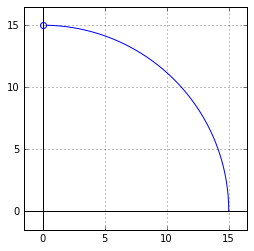

In [127]:
radius = 15
initial_speed = 0

for dv in [100,10,1,0.1]:
    while True:
        initial_speed += dv
        omega = initial_speed / radius

        obj = Particle()
        obj.position.series.pop()

        t = 0
        while True:
            theta = omega * t
            location = vect(radius, theta)
            obj.position.append(t, location)
            if theta > 90:
                break
            t += 0.01

        t = obj.position.timeline[-1]
        a = obj.acceleration(t)
        
        if vmag(a) > 7.5 * 9.8:
            initial_speed -= dv
            break
        
r = obj.position
v = r.rate_of_change()
r.plot2d()

t = r.timeline[-1]
print('tangential speed = {:.2f} m/s'.format(vmag(v.values[-1])))
print('duration = {:.2f} seconds'.format(t))

a = obj.acceleration(t)
print('magnitude of acceleration = {:.2f} m/s²'.format(vmag(a)))